In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the train and test datasets
train_data = pd.read_csv('emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('emnist-bymerge-test.csv', header=None)

In [3]:
# Separate features and labels
train_features = train_data.iloc[:, 1:]
train_labels = train_data.iloc[:, 0]
test_features = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, 0]

In [4]:
# Reshape the features
train_features = train_features.values.reshape(-1, 28, 28, 1)
test_features = test_features.values.reshape(-1, 28, 28, 1)

In [5]:
# Convert labels to numeric values
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

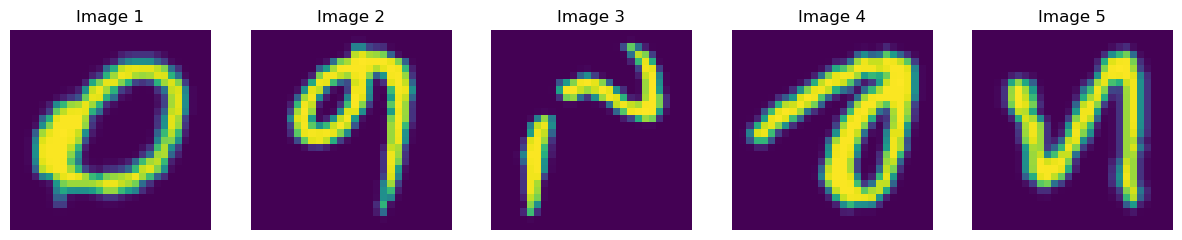

In [6]:
import matplotlib.pyplot as plt

# Display the first five images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(train_features[i])
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.show()

In [7]:
# Split the data into training and validation sets
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

In [8]:
# Standardize features using StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features.reshape(-1, 784)).reshape(-1, 28, 28, 1)
val_features = scaler.transform(val_features.reshape(-1, 784)).reshape(-1, 28, 28, 1)
test_features = scaler.transform(test_features.reshape(-1, 784)).reshape(-1, 28, 28, 1)

In [9]:
# Convert labels to categorical format
num_classes = 47  # Replace with the actual number of classes in your dataset
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [10]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_data=(val_features, val_labels))


Epoch 1/10
4363/4363 [==============================] - 179s 41ms/step - loss: 0.4941 - accuracy: 0.8416 - val_loss: 0.3831 - val_accuracy: 0.8713
Epoch 2/10
4363/4363 [==============================] - 155s 35ms/step - loss: 0.3533 - accuracy: 0.8787 - val_loss: 0.3558 - val_accuracy: 0.8801
Epoch 3/10
4363/4363 [==============================] - 151s 35ms/step - loss: 0.3235 - accuracy: 0.8868 - val_loss: 0.3401 - val_accuracy: 0.8833
Epoch 4/10
4363/4363 [==============================] - 148s 34ms/step - loss: 0.3041 - accuracy: 0.8915 - val_loss: 0.3338 - val_accuracy: 0.8857
Epoch 5/10
4363/4363 [==============================] - 159s 36ms/step - loss: 0.2909 - accuracy: 0.8950 - val_loss: 0.3399 - val_accuracy: 0.8852
Epoch 6/10
4363/4363 [==============================] - 157s 36ms/step - loss: 0.2796 - accuracy: 0.8979 - val_loss: 0.3334 - val_accuracy: 0.8875
Epoch 7/10
4363/4363 [==============================] - 153s 35ms/step - loss: 0.2708 - accuracy: 0.9005 - val_loss: 0

In [13]:
# Make predictions on the test set
y_pred = model.predict(test_features)

3636/3636 [==============================] - 14s 4ms/step


In [14]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_labels, y_pred))
print("RMSE:", rmse)

RMSE: 0.0588524
